<a href="https://colab.research.google.com/github/giangervasoni/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/Sakila_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakila Database

A normalised schema modelling a DVD rental store, featuring things like films, actors, film-actor relationships, and a central inventory table that connects films, stores, and rentals.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn

In [3]:
conn = sqlite3.connect('/content/sakila.db')

In [4]:
df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [5]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [6]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


We've described the data, checked the info presented, data types, and imported the data and libraries we're gonna use for the analysis.

In [10]:
round(df['film_rental_rate'].describe(), 2)

count    16044.00
mean         2.94
std          1.65
min          0.99
25%          0.99
50%          2.99
75%          4.99
max          4.99
Name: film_rental_rate, dtype: float64

In [29]:
df['film_rental_rate'].value_counts()

0.99    5652
4.99    5272
2.99    5120
Name: film_rental_rate, dtype: int64

In [24]:
X = round(df['film_rental_rate'].mean(), 2)

In [22]:
SD = round(df['film_rental_rate'].std(), 2)

In [28]:
print('The mean is', X, '±', SD)

The mean is 2.94 ± 1.65


In [12]:
round(df['film_rental_rate'].median(), 2)

2.99

Text(0, 0.5, 'Density')

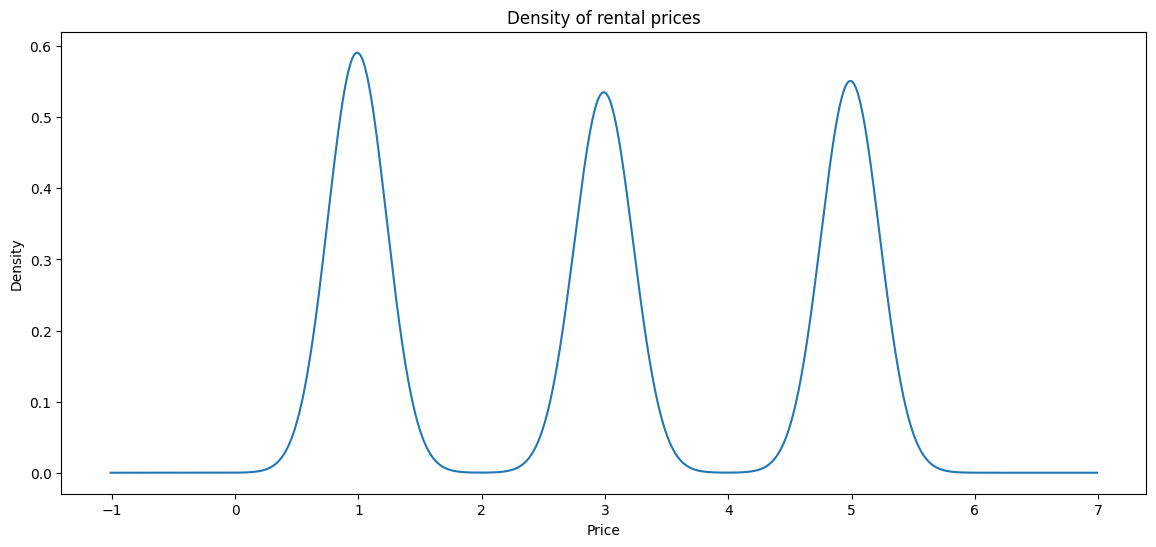

In [32]:
df['film_rental_rate'].plot(kind='density', figsize=(14,6))

plt.title('Density of rental prices')
plt.xlabel('Price')
plt.ylabel('Density')

Film rental prices are differnt (0.99, 2.99, 4.99), but the count and density of it are fairly similar.

In [52]:
f_statistic, p_value = f_oneway(*data)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [53]:
print("F-statistic: ", f_statistic)
print("p-value: ", p_value)

if p_value < 0.05:
    print("There is a statistically significant difference between the rental rates.")
else:
    print("There is no statistically significant difference between the rental rates.")

F-statistic:  inf
p-value:  0.0
There is a statistically significant difference between the rental rates.


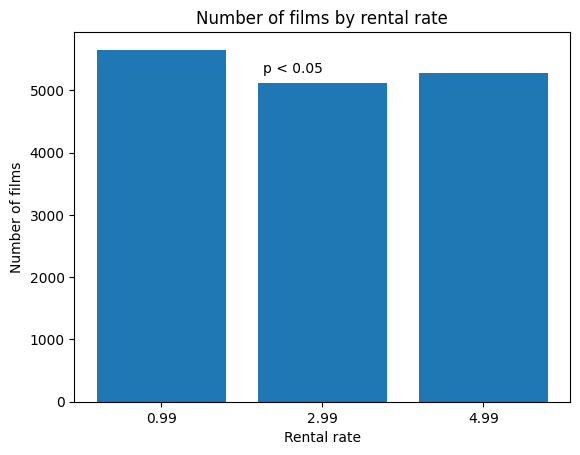

In [75]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# create data
rental_rates = ['0.99', '2.99', '4.99']
data = []
for rate in rental_rates:
    data.append(df['film_rental_rate'].loc[df['film_rental_rate'] == float(rate)])

# calculate F-statistic and p-value
f_statistic, p_value = f_oneway(*data)

# create bar graph
plt.bar(rental_rates, [len(d) for d in data])
plt.title('Number of films by rental rate')
plt.xlabel('Rental rate')
plt.ylabel('Number of films')

# annotate with p-value text
if p_value < 0.05:
    plt.annotate('p < 0.05', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', va='center')
else:
    plt.annotate('p > 0.05', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', va='center')

plt.show()


In [76]:
from scipy.stats import ttest_ind

data_0_99 = df['film_rental_rate'].loc[df['film_rental_rate'] == 0.99]
data_2_99 = df['film_rental_rate'].loc[df['film_rental_rate'] == 2.99]
data_4_99 = df['film_rental_rate'].loc[df['film_rental_rate'] == 4.99]

tstat_0_99_vs_2_99, pval_0_99_vs_2_99 = ttest_ind(data_0_99, data_2_99)
tstat_0_99_vs_4_99, pval_0_99_vs_4_99 = ttest_ind(data_0_99, data_4_99)

print("t-statistic (0.99 vs 2.99): ", tstat_0_99_vs_2_99)
print("p-value (0.99 vs 2.99): ", pval_0_99_vs_2_99)
if pval_0_99_vs_2_99 < 0.05:
    print("There is a statistically significant difference between rental rates 0.99 and 2.99.")
else:
    print("There is no statistically significant difference between rental rates 0.99 and 2.99.")

print("t-statistic (0.99 vs 4.99): ", tstat_0_99_vs_4_99)
print("p-value (0.99 vs 4.99): ", pval_0_99_vs_4_99)
if pval_0_99_vs_4_99 < 0.05:
    print("There is a statistically significant difference between rental rates 0.99 and 4.99.")
else:
    print("There is no statistically significant difference between rental rates 0.99 and 4.99.")


t-statistic (0.99 vs 2.99):  -3.274408567829363e+17
p-value (0.99 vs 2.99):  0.0
There is a statistically significant difference between rental rates 0.99 and 2.99.
t-statistic (0.99 vs 4.99):  -3.3574823448129146e+17
p-value (0.99 vs 4.99):  0.0
There is a statistically significant difference between rental rates 0.99 and 4.99.


<ipython-input-76-b69d0db39c5c>:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tstat_0_99_vs_2_99, pval_0_99_vs_2_99 = ttest_ind(data_0_99, data_2_99)
<ipython-input-76-b69d0db39c5c>:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tstat_0_99_vs_4_99, pval_0_99_vs_4_99 = ttest_ind(data_0_99, data_4_99)


In [77]:
tstat_2_99_vs_4_99, pval_2_99_vs_4_99 = ttest_ind(data_2_99, data_4_99)

print("t-statistic (2.99 vs 4.99): ", tstat_2_99_vs_4_99)
print("p-value (2.99 vs 4.99): ", pval_2_99_vs_4_99)
if pval_2_99_vs_4_99 < 0.05:
    print("There is a statistically significant difference between rental rates 2.99 and 4.99.")
else:
    print("There is no statistically significant difference between rental rates 2.99 and 4.99.")

t-statistic (2.99 vs 4.99):  -1.4451859159876445e+17
p-value (2.99 vs 4.99):  0.0
There is a statistically significant difference between rental rates 2.99 and 4.99.


<ipython-input-77-682f709fae30>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tstat_2_99_vs_4_99, pval_2_99_vs_4_99 = ttest_ind(data_2_99, data_4_99)


We've done an ANOVA to see if the rental rates are different between them. We've seen that 0.99 has the higher value of all, followed by 4.99, and 2.99 is last. We can assure they're different for their respective p-value we obtained.

In [79]:
df['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

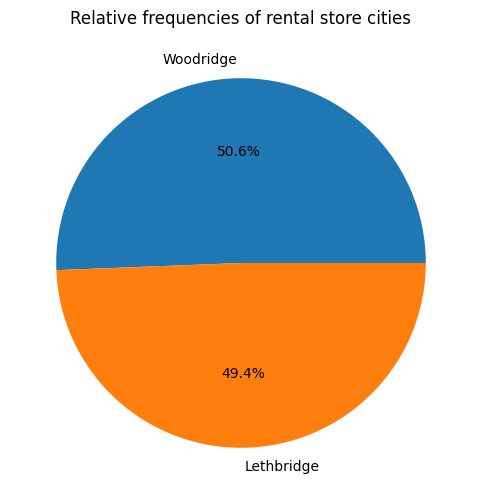

In [81]:
counts = df['rental_store_city'].value_counts()

relative_freqs = counts / counts.sum()

plt.figure(figsize=(6, 6))
plt.pie(relative_freqs, labels=relative_freqs.index, autopct='%1.1f%%')
plt.title('Relative frequencies of rental store cities')
plt.show()

Both cities are very similar in terms of number of rentals done.

In [90]:
df['rental_gain_return'] = (df['film_rental_rate'] / df['film_replacement_cost'] * 100).round(2)

df['rental_gain_return'].head()

rental_id
1    13.60
2    17.60
3    19.95
4     4.50
5     9.97
Name: rental_gain_return, dtype: float64

In [95]:
round(df['rental_gain_return'].describe(), 2)

count    16044.00
mean        16.34
std         11.41
min          3.30
25%          6.19
50%         13.60
75%         23.02
max         49.95
Name: rental_gain_return, dtype: float64

In [96]:
round(df['rental_gain_return'].median(), 1)

13.6

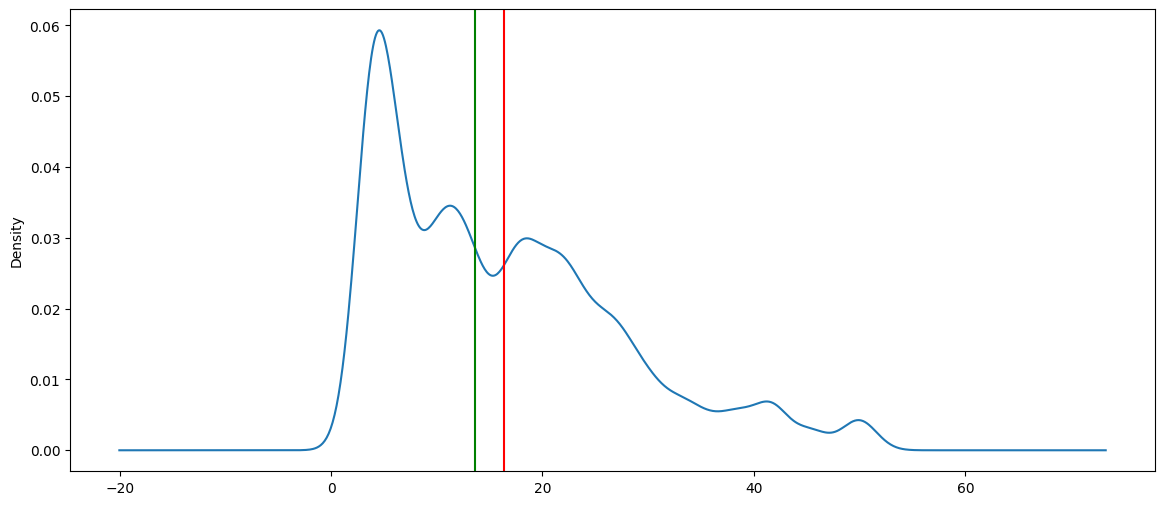

In [93]:
ax = df['rental_gain_return'].plot(kind='density', figsize=(14,6))
ax.axvline(df['rental_gain_return'].mean(), color='red')
ax.axvline(df['rental_gain_return'].median(), color='green')

We can see that the mean gain return from film renting is 16.34%. The distribution is skewed to the left, as reflected by the median (13.60%).

In [98]:
film_replacement_cost_rounded = round(100/13.6, 2)
print(film_replacement_cost_rounded)

7.35


This means that, in average, the store has to rent each film 8 (7.35) times to be profitable. 

In [100]:
round(df['film_title'].value_counts().mean(), 2)

16.75

On average, each movie is rented 16.75 times, so is profitable. We lack data on the operating cost of the business as a whole to calculate if the local is profitable.

In [101]:
df['film_rental_duration'].value_counts()

3    3412
6    3392
4    3251
5    3165
7    2824
Name: film_rental_duration, dtype: int64

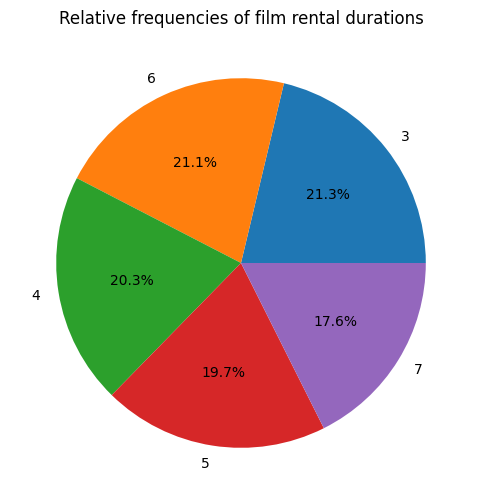

In [105]:
counts = df['film_rental_duration'].value_counts()

relative_freqs = counts / counts.sum()

plt.figure(figsize=(6, 6))
plt.pie(relative_freqs, labels=relative_freqs.index, autopct='%1.1f%%')
plt.title('Relative frequencies of film rental durations')
plt.show()

In [107]:
df['film_rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

<Axes: >

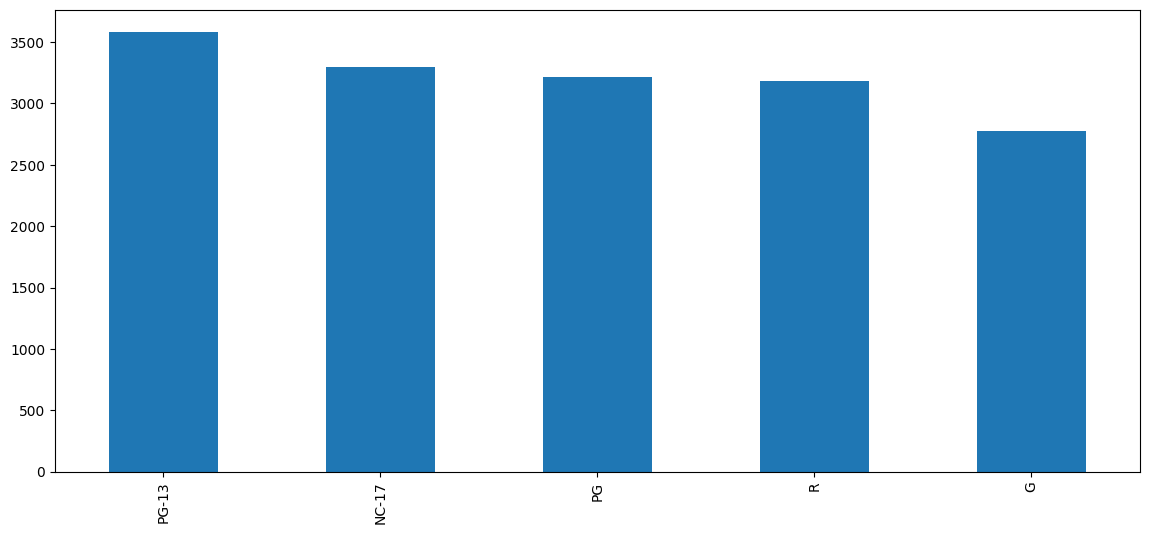

In [108]:
df['film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

In [122]:
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')].shape[0]

6797

3 and 6 days are the time frames people rent the films more often. Also, PG-13 are the most preferred types of films, followed by NC-17 and PG.

6797 films are rated as PG or PG-13.

In [113]:
df['film_title'].value_counts().head(10)

BUCKET BROTHERHOOD     34
ROCKETEER MOTHER       33
FORWARD TEMPLE         32
JUGGLER HARDLY         32
SCALAWAG DUCK          32
RIDGEMONT SUBMARINE    32
GRIT CLOCKWORK         32
TIMBERLAND SKY         31
ROBBERS JOON           31
RUSH GOODFELLAS        31
Name: film_title, dtype: int64

In [116]:
round(df['film_title'].value_counts().mean(), 2)

16.75

Bucket brotherhood was the most rented film, followed by Rocketeer mother. These films are rented almost twice as much as the average film.

In [119]:
df['film_replacement_cost'].max()

29.99

In [121]:
df.loc[df['film_replacement_cost'] == df['film_replacement_cost'].max(), 'film_title'].unique()

array(['IDOLS SNATCHERS', 'LAWLESS VISION', 'SONG HEDWIG',
       'LOATHING LEGALLY', 'PATIENT SISTER', 'RESERVOIR ADAPTATION',
       'JEEPERS WEDDING', 'GOLDFINGER SENSIBILITY', 'CHARIOTS CONSPIRACY',
       'HONEY TIES', 'GRAFFITI LOVE', 'SLACKER LIAISONS', 'DIRTY ACE',
       'BLINDNESS GUN', 'WYOMING STORM', 'FEUD FROGMEN', 'SALUTE APOLLO',
       'JINGLE SAGEBRUSH', 'HILLS NEIGHBORS', 'UNCUT SUICIDES',
       'EVERYONE CRAFT', 'FLATLINERS KILLER', 'BALLROOM MOCKINGBIRD',
       'RIVER OUTLAW', 'ARABIA DOGMA', 'VIRGIN DAISY', 'JERICHO MULAN',
       'SASSY PACKER', 'TRACY CIDER', 'LOVER TRUMAN', 'DOCTOR GRAIL',
       'GILMORE BOILED', 'PRINCESS GIANT', 'CRUELTY UNFORGIVEN',
       'REIGN GENTLEMEN', 'WEST LION', 'BONNIE HOLOCAUST', 'EARTH VISION',
       'RANDOM GO', 'CLOCKWORK PARADISE', 'FANTASIA PARK', 'RIGHT CRANES',
       'CUPBOARD SINNERS', 'OSCAR GOLD', 'SMILE EARRING',
       'HOLLYWOOD ANONYMOUS', 'POSEIDON FOREVER',
       'EXTRAORDINARY CONQUERER', 'QUEST MUSSOLINI', 

These films have the highest replacement cost of all.